## INTRODUCTION

Milan is continuously expanding and, consequently, also the demand for new restaurants is following a positive trend. Due to the very wide offer of types of cuisine that the city is able to offer, it can be difficult to understand which is the right place where a certain new restaurant should be opened or, given a certain neighbourhood, which is the most appropriate type.

Data Science can help simplifying part of this problem. It is possible to use Foursquare location data to divide Milan in different neighourhoods according to their postal codes and to identify which types of restaurant are present in each area.

After the identification of each district, it will be possible to apply a Machine Learning algorithm, k-means clustering, to group the different neighbourhoods according to the most relevant types of restaurant present in them and to understand which conclusions is it possible to take.

## DATA DESCRIPTION

In order to carry out this project, the data which have been considered were mainly taken from two main sources:

1. "http://www.omarpela.com/milano/cap-codice-di-avviamento-postale-vie-milano.html", from this website it was possible to extract a list of streets of Milan, each with its own reference postal code;

2. Foursquare API, from which the coordinates of the most relevant venues in each neighbourhood could be identified.

## METHODOLOGY

In order to initiate the analysis, it was necessary to divide Milan in different areas and, in order to do that, it has been decided to distinguish the neighbourhoods according to their postal codes, assessing a center and a radius for each of them.

From the streets scraped from the .html page [1], it was possible, after a proper cleaning of the output, to identify a dataframe containing the names of the roads and its belonging postal code. The 'geolocator.geocode' was later used to allocate on each item the latitude and longitude coordinates.

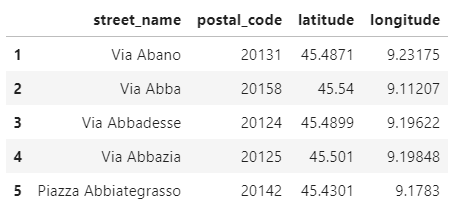

Once the dataframe has been created, it was possible to estimate the center and the radius of each neighbourhood of Milan. The Folium package was very useful to verify that the circles obtained were not overlapping too much and the output was robust.

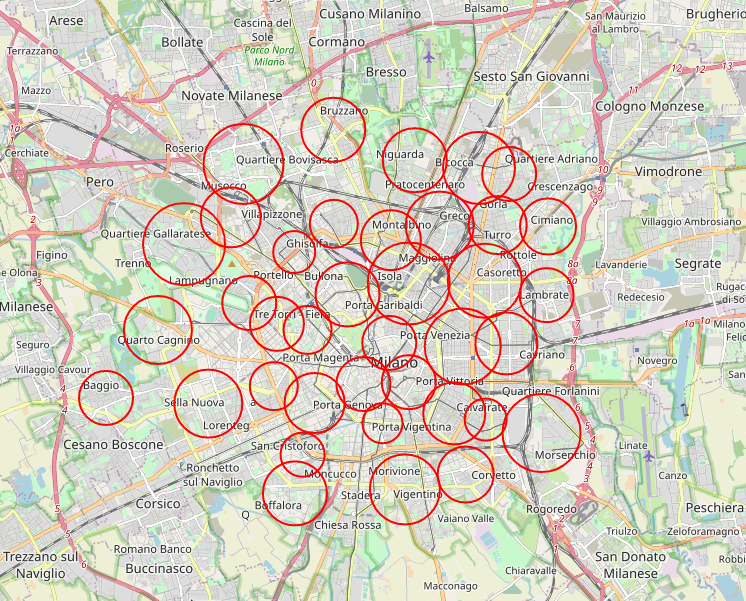

The Foursquare API was queried using those coordinates, in order to identify the most relevant venues present in each borough, storing the information in a dataframe.
Later, it was necessary to filter the dataframe and extract, from the feature "avenues_category", only the venues related to a type of restaurants, in order to focus the research on the right topic.

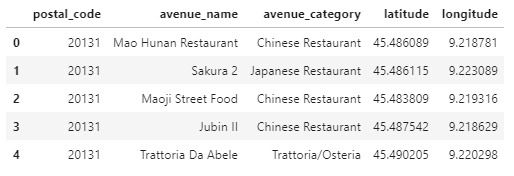

The dataframe yet required some additional adjustments, so, as first, it was decided to remove duplicates. In addition, from the feature "avenue_category" it was decided to remove the label "Restaurant" as, while being very present, it is too generic and it likely hides significant information, while watering down others.

As for the analysis, it was decided to use unsupervised K-Means algorithm, since the target of the research was to identify possible hidden commonances among the neighbourhoods.
Before running KMeans algorithm, it is necessary to assess the proper value of k, which is the number of clusters in which the dataset will be split. 

Several analysis with different values of k, from 2 to 9, have been then run, saving from each the distorsion coefficient. 
Increasing the number of clusters, the precision raises, thus it is necessary to check the "elbow curve", seeing on which value of k the precision increases less.

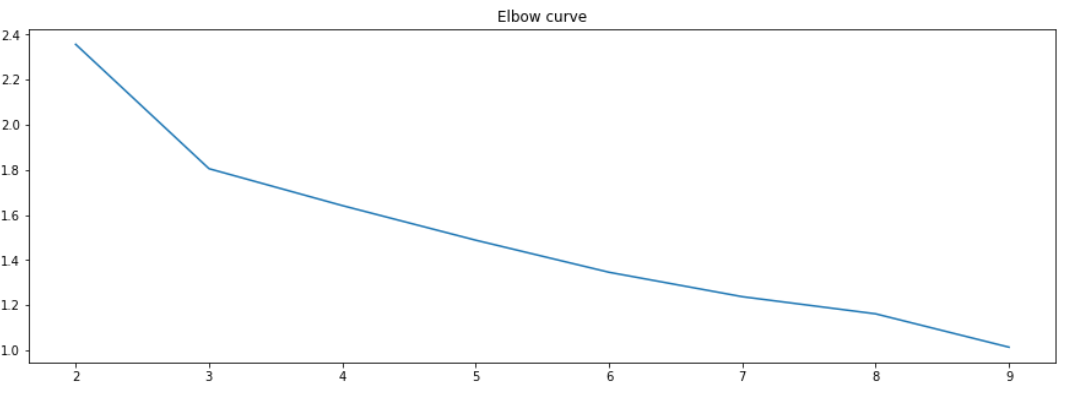

From the chart, it is possible to notice that the desired number of clusters for the algorithm is 3.

The analysis has been then run with k = 3, identifying the labels for each borough and including in the dataframe.

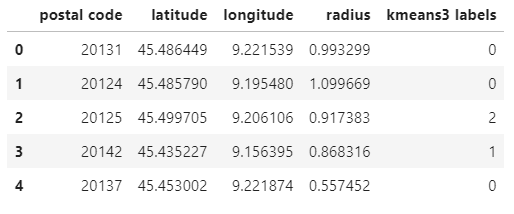

## RESULTS

Once the labels have been obtained, it is possible to run them on a Folium map, in order to see if there are immediately recognizable geografical patterns.

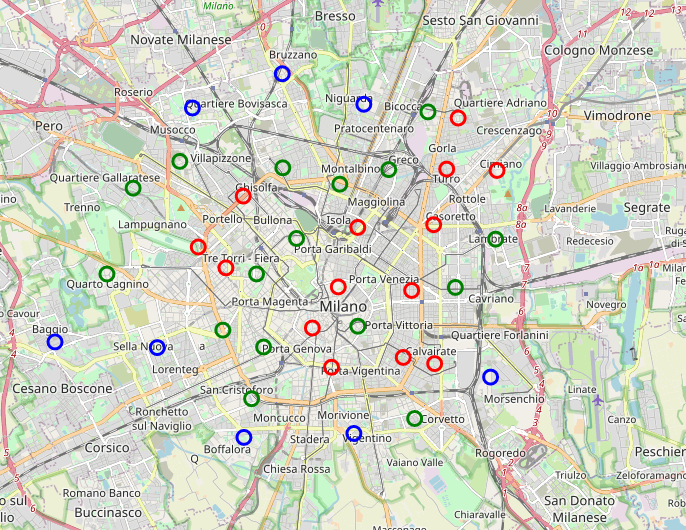

Actually, the blue cluster tends to be a little more present on the outer neighbourhoods, while red and green tend to split the left and right sides.
Since the target was to identify some pattern among the restaurant types distribution, these results show that this could be the right direction.

In order to confirm it, some analysis on the clusters and their data distribution have been conducted.
In particular, for each cluster, the most common types of restaurant were identified and the average of the presence was calculated and displayed on a scatter plot.

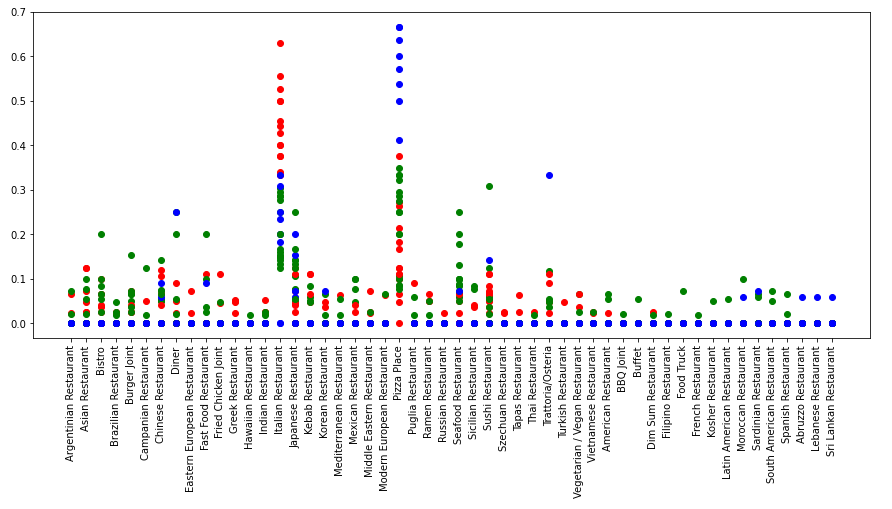

## DISCUSSION OF THE RESULTS

The easiest result that is possible to notice is that in Milan the majority of the restaurants are Italian or are Pizza place. While this aspects seemed easily foreeseable, it also shows a limit of the categories presented by Foursquare API, because "Italian Restaurant", especially in Italy, is probably too vague, as it can be differentiated according to local cuisuine of the different regions.

Anyway, the average distribution of the most common type of restaurants seem to match the geographical clustering highlighted with the clustering.

In fact, the blue cluster, that is number 2, is the one that probably better characterize the restaurant in the most peripherical boroughs, shows a high presence of "Pizza place" that, while being part of Italian cuisine, is probably cheaper than a more traditional Italian restaurant.

The red cluster instead, number 1, presents a higher percentage of Italian Restaurant,  on average more expensive, is in fact associated with the right/center area of Milan, which is typically more luxurious.

## CONCLUSIONS

While this analysis seems to identifies a certain trend and distribution of the restaurants in Milan, it could be greatly improved if combined with a more accurate analysis of the cost of life in Milan, which could help contextualizing the above results.
Yet, in case of a real problem related to the necessity of opening a new restaurant in Milan, this research could be a first step, which should lead to an economical analysis.

Concerning the study itself, it would probably require to use a better starting dataset where the information about the venues should be taken, as Foursquare seems to have too broade categories, which will likely need to be brokedown manually, for example the "Restaurant" and "Italian Restaurant" categories.